# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.158850e+01     7.080262e+00
 * time: 0.004911899566650391
     1     2.905943e+01     5.805854e+00
 * time: 0.014873027801513672
     2     1.713067e+01     3.537968e+00
 * time: 0.04732489585876465
     3     1.325125e+01     1.805607e+00
 * time: 0.07477903366088867
     4     1.180695e+01     1.691257e+00
 * time: 0.10127997398376465
     5     1.101065e+01     1.341314e+00
 * time: 0.12100505828857422
     6     1.046761e+01     1.306482e+00
 * time: 0.1394491195678711
     7     1.001293e+01     8.898230e-01
 * time: 0.21802902221679688
     8     9.679172e+00     1.009130e+00
 * time: 0.23840808868408203
     9     9.669835e+00     1.490378e+00
 * time: 0.25287699699401855
    10     9.526313e+00     1.057717e+00
 * time: 0.2728888988494873
    11     9.500274e+00     1.355424e+00
 * time: 0.28737592697143555
    12     9.452104e+00     9.180091e-01
 * time: 0.3020761013031006
    13     9.368068e+00     7.426717e-01
 * time: 

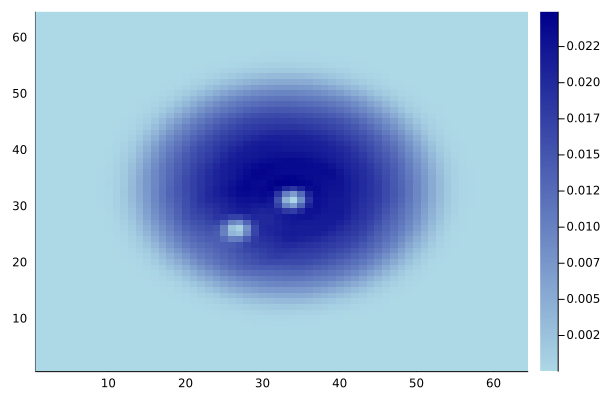

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)